In [1]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')


In [2]:
from preprocess import load_model

corpus, dictionary, tfidf, lsi, mSimilar = load_model("./preprocess/model_test/")
corpus_t, dictionary_t, tfidf_t, lsi_t, mSimilar_t = load_model("./preprocess/model/")

2021-04-11 09:39:19,230 : INFO : loaded corpus index from ./preprocess/model_test/corpus.mm.index
2021-04-11 09:39:19,230 : INFO : initializing cython corpus reader from ./preprocess/model_test/corpus.mm
2021-04-11 09:39:19,230 : INFO : accepted corpus with 9832 documents, 255193 features, 7002755 non-zero entries
2021-04-11 09:39:19,238 : INFO : loading Dictionary object from ./preprocess/model_test/model.dic
2021-04-11 09:39:19,501 : INFO : Dictionary lifecycle event {'fname': './preprocess/model_test/model.dic', 'datetime': '2021-04-11T09:39:19.501308', 'gensim': '4.0.1', 'python': '3.9.2 (tags/v3.9.2:1a79785, Feb 19 2021, 13:44:55) [MSC v.1928 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}
2021-04-11 09:39:19,501 : INFO : loading TfidfModel object from ./preprocess/model_test/model.tfidf
2021-04-11 09:39:19,864 : INFO : TfidfModel lifecycle event {'fname': './preprocess/model_test/model.tfidf', 'datetime': '2021-04-11T09:39:19.864074', 'gensim': '4.0.

In [3]:
X = lsi[tfidf[corpus]]
X_t = lsi_t[tfidf_t[corpus_t]]

In [4]:
import numpy as np
from training_utils import get_list

X_list = get_list(X)
X_array = np.array(X_list)
X_torch = torch.from_numpy(X_array)


In [5]:
import numpy as np

X_list_t = get_list(X_t)
X_array_t = np.array(X_list_t)
X_torch_t = torch.from_numpy(X_array_t)

In [6]:
from file_utils import get_files

f_list = get_files("./corpus/test/")
l = np.array([int(i.split("\\")[-1].split("-")[0][1:]) for i in f_list])
f_list = get_files("./corpus/train/")
l_t = np.array([int(i.split("\\")[-1].split("-")[0][1:]) for i in f_list])

测试集上结果

In [7]:
from kmeans.gensim_kmeans_plus_plus import KMeansPlusPlus
from training_utils import best_map, scores

kmeans_plus_plus = KMeansPlusPlus(20, random_state=53, device=device)
label, _ = kmeans_plus_plus.fit_predict(X, mSimilar, X_array, X_torch)
acc, label_pred = best_map(l, label.numpy())
print("准确率:", acc)
scores(l, label_pred)


准确率: 0.5044751830756713
互信息：1.4217631369304278
调整互信息：0.5587388271260791
标准化互信息：0.5621166400506417
兰德系数： 0.44670758997699517


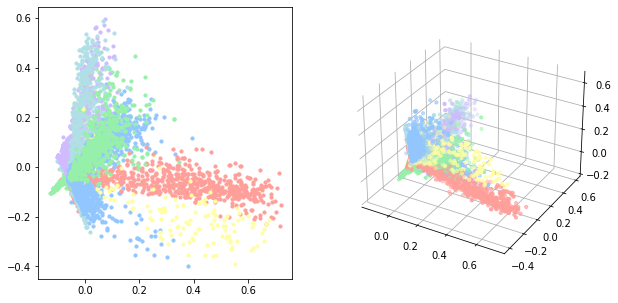

In [8]:
from training_utils import draw

draw(X_array, label)

训练集上结果

In [9]:
from kmeans.gensim_kmeans_plus_plus import KMeansPlusPlus
from training_utils import best_map, scores

kmeans_plus_plus = KMeansPlusPlus(20, random_state=261, device=device)
label, _ = kmeans_plus_plus.fit_predict(X_t, mSimilar_t, X_array_t, X_torch_t)
acc, label_pred = best_map(l_t, label.numpy())
print("准确率:", acc)
scores(l_t, label_pred)

准确率: 0.5003059975520195
互信息：1.435571673621101
调整互信息：0.5627573158372692
标准化互信息：0.5661183749890362
兰德系数： 0.4386899748856166


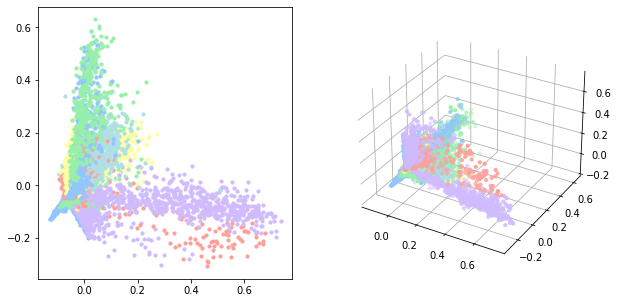

In [10]:
from training_utils import draw

draw(X_array_t, label)

使用训练集进行训练，测试集进行测试

In [11]:
from kmeans.gensim_kmeans_plus_plus import KMeansPlusPlus
from training_utils import best_map, scores

kmeans_plus_plus = KMeansPlusPlus(20, random_state=609, device=device)
model = kmeans_plus_plus.fit(X_t, mSimilar_t, X_array_t, X_torch_t)
label = model.predict(mSimilar)
acc, label_pred = best_map(l, label.numpy())
print("准确率:", acc)
scores(l, label_pred)


准确率: 0.5197314890154597
互信息：1.1279956943571647
调整互信息：0.49163558122887974
标准化互信息：0.495027827786396
兰德系数： 0.35205177843727853


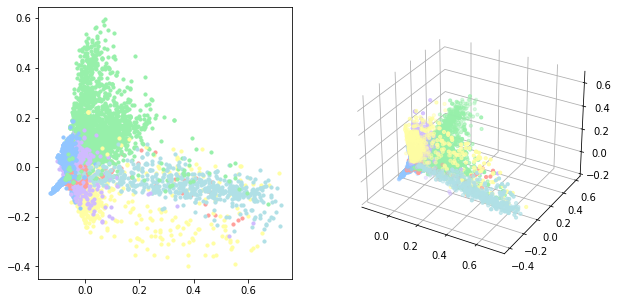

In [12]:
from training_utils import draw

draw(X_array, label)

In [11]:
from training_utils import best_map
from kmeans.gensim_kmeans_plus_plus import KMeansPlusPlus

max_acc = 0
max_i = -1
# train 629
# test 98
# train test 102 202
for i in range(1000):
    kmeans_plus_plus = KMeansPlusPlus(20, random_state=i, device=device)
    label, _ = kmeans_plus_plus.fit_predict(X, mSimilar, X_array, X_torch)
    acc, _ = best_map(l, label.numpy())
    if acc > max_acc:
        max_acc = acc
        max_i = i
    if acc > 0.45:
        print(i, acc)
print("max", max_i, max_acc)

7 0.4811838893409276
15 0.4520951993490643
18 0.46847030105777054
20 0.4520951993490643
23 0.4597233523189585
32 0.45351912123677784
39 0.48362489829129374
53 0.5044751830756713
68 0.4586045565500407
77 0.472233523189585
85 0.47345402766476813
121 0.4521969080553295
122 0.4522986167615948
123 0.45382424735557364
131 0.4510781122864117
175 0.4613506916192026
183 0.4566720911310008
184 0.45351912123677784
193 0.4713181448331977
197 0.4981692432872254
241 0.46114727420667206
261 0.45168836452400324
264 0.47009764035801466
292 0.45962164361269325
293 0.4550447518307567
315 0.47314890154597233
321 0.4517900732302685
326 0.45362082994304315
335 0.46847030105777054
336 0.4506712774613507
341 0.45636696501220503
343 0.4576891781936534
367 0.4506712774613507
368 0.4529088689991863
374 0.45779088689991865
407 0.4532139951179821
426 0.4532139951179821
442 0.46358828315703826
445 0.46399511798209925
446 0.4709113100081367
452 0.4503661513425549
463 0.4544344995931652
482 0.45199349064279903
492 0.

In [11]:
from training_utils import best_map
from kmeans.gensim_kmeans_plus_plus import KMeansPlusPlus

max_acc = 0
max_i = -1

for i in range(1000):
    kmeans_plus_plus = KMeansPlusPlus(20, random_state=i, device=device)
    label, _ = kmeans_plus_plus.fit_predict(X_t, mSimilar_t, X_array_t, X_torch_t)
    acc, _ = best_map(l_t, label.numpy())
    if acc > max_acc:
        max_acc = acc
        max_i = i
    if acc > 0.45:
        print(i, acc)
print("max", max_i, max_acc)

16 0.4656262749898001
58 0.4752141982864137
60 0.47062423500611994
77 0.4597103223174215
122 0.47501019991840066
130 0.487250101999184
134 0.4531823745410037
140 0.4883720930232558
161 0.4501223990208078
167 0.48235414116687064
261 0.5003059975520195
262 0.4518563851489188
304 0.47460220318237456
359 0.49020807833537333
368 0.4848021215830273
386 0.46399428804569565
387 0.46266829865361075
414 0.46776825785393716
429 0.47195022439820483
486 0.4610363117095063
496 0.46083231334149327
498 0.4545083639330885
537 0.4694002447980416
550 0.45338637290901673
572 0.4539983680130559
598 0.467156262749898
609 0.45165238678090575
681 0.4595063239494084
686 0.45644634842921256
717 0.4579763361893105
719 0.4532843737250102
732 0.46980824153406775
750 0.454406364749082
757 0.46430028559771525
764 0.4763361893104855
766 0.4692982456140351
773 0.4919420644634843
780 0.48714810281517745
800 0.4669522643818849
838 0.4511423908608731
858 0.46409628722970214
877 0.46113831089351287
892 0.4613423092615259


In [ ]:
max_acc = 0
max_i = -1
from training_utils import best_map
from kmeans.gensim_kmeans_plus_plus import KMeansPlusPlus

# 609
for i in range(2000):
    kmeans = KMeansPlusPlus(20, random_state=i, device=device)
    model = kmeans.fit(X_t, mSimilar_t, X_array_t, X_torch_t)
    label_t = model.predict(mSimilar)
    acc, _ = best_map(l, label_t.numpy())
    if acc > max_acc:
        max_acc = acc
        max_i = i
    if acc > 0.48:
        print(i, acc)
print("max", max_i, max_acc)

14 0.48687957689178196
38 0.49389747762408465
56 0.48545565500406834
120 0.48525223759153785
135 0.48098047192839705
140 0.48576078112286414
155 0.5100691619202604
156 0.4825061025223759
167 0.4808787632221318
226 0.4850488201790073
233 0.49288039056143207
237 0.48260781122864116
252 0.4923718470301058
261 0.48576078112286414
269 0.48565907241659884
275 0.4823026851098454
304 0.4873881204231082
305 0.4866761594792514
309 0.4913547599674532
359 0.5326484947111473
373 0.503559804719284
378 0.4955248169243287
385 0.491659886086249
389 0.4947111472742067
413 0.48260781122864116
415 0.48148901545972334
427 0.5010170870626526
429 0.5025427176566314
434 0.48891375101708706
448 0.4871847030105777
459 0.49308380797396256
511 0.4955248169243287
513 0.49644019528071603
532 0.4808787632221318
582 0.4846419853539463
600 0.4882017900732303
609 0.5197314890154597
621 0.4848454027664768
634 0.49013425549227013
658 0.48565907241659884
682 0.5093572009764036
692 0.4883034987794955
700 0.5157648494711147